## 3.2. Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
import matplotlib
import random
import jax
import jax.numpy as jnp
from jax import random
import numpy as np

### 3.2.1. Generating the Dataset

(1000, 2)
(1000, 1)
features: [-1.196918   -0.16342507] 
label: [-1.8336298]


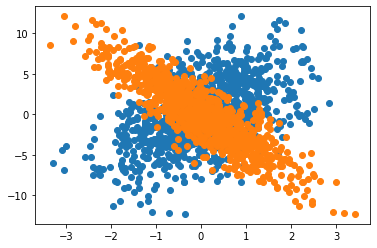

In [2]:
key = jax.random.PRNGKey(1071)

def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = jax.random.normal(key, shape=(num_examples, len(w)))
    y = jax.numpy.matmul(X, w) + np.random.normal(0, 0.01, size=(num_examples, 1))
    return X, y
true_w = jnp.array([[2, -3.4]])
true_b = 4.2
num_examples = 1000
features, labels = synthetic_data(jnp.transpose(true_w), true_b, num_examples)
print(jnp.shape(features))
print(jnp.shape(labels))
print('features:', features[0],'\nlabel:', labels[0])

matplotlib.pyplot.scatter(features[:, 0], labels)
matplotlib.pyplot.scatter(features[:, 1], labels)

### 3.2.2 Reading the Dataset

In [3]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = jax.numpy.array(range(num_examples))
    # The examples are read at random, in no particular order
    jax.random.permutation(key, indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = jnp.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [4]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[-1.196918   -0.16342507]
 [ 1.818136   -0.02618674]
 [-0.5925458  -0.773384  ]
 [-0.1722815  -0.54554236]
 [-1.5969205  -0.73850787]
 [-1.6086253  -0.02185807]
 [ 1.5184388  -0.3534325 ]
 [-0.26321772  0.20963678]
 [ 0.13174964  0.40896437]
 [-1.0124239  -0.61473286]] 
 [[-1.8336298 ]
 [ 3.7241604 ]
 [ 1.4448211 ]
 [ 1.507385  ]
 [-0.66629875]
 [-3.1548507 ]
 [ 4.2409883 ]
 [-1.2265179 ]
 [-1.1361338 ]
 [ 0.05116016]]


### 3.2.3. Initializing Model Parameters

In [5]:
w = jax.random.normal(key, shape=(2, 1))
b = jnp.zeros(1)

### 3.2.4. Defining the Model

In [6]:
def linreg(X, w, b):
    """The linear regression model."""
    return jnp.dot(X, w) + b

### 3.2.5. Defining the Loss Function

In [7]:
def squared_loss(y_hat, y):
    return jnp.mean(0.5 * jnp.square(y_hat - y.reshape(y.shape)))

### 3.2.6. Defining the Optimization Algorithm

In [41]:
def sgd(params, b, grads, lr=0.01):
    w_grad = grads[0]
    bias_grad = grads[1]
#     params = params.at[:].add(-lr * w_grad / batch_size)
#     b = b.at[:].add(-lr * bias_grad / batch_size)
    params -= lr * w_grad / batch_size
    b -= lr * bias_grad / batch_size
    return params, b

### 3.2.7. Training

In [42]:
lr = 0.03
num_epochs = 3

def loss(X, w, b, y_hat):
    y = linreg(X, w, b)
    return squared_loss(y_hat, y)

grad_func = jax.grad(loss, argnums=[1,2])

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(X, w, b, y)
        grads = grad_func(X, w, b, y)
        w, b = sgd(w, b, grads)
#         w -= lr * grads[0] / batch_size
#         b -= lr * grads[1] / batch_size
    train_l = squared_loss(labels, linreg(features, w, b))
    print("loss: {0}".format(train_l.mean()))
        

loss: 0.00017371935246046633
loss: 0.00015047659690026194
loss: 0.00013158534420654178
